# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nikolskoye
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bulaevo
Processing Record 9 of Set 1 | seydi
Processing Record 10 of Set 1 | nahrin
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | marawi
Processing Record 13 of Set 1 | udachnyy
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | camrose
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | itupiranga
Processing Record 18 of Set 1 | oranjestad
Processing Record 19 of Set 1 | qui nhon
City not found. Skipping...
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Se

Processing Record 33 of Set 4 | yarada
Processing Record 34 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 4 | high level
Processing Record 36 of Set 4 | resistencia
Processing Record 37 of Set 4 | cidreira
Processing Record 38 of Set 4 | caconda
Processing Record 39 of Set 4 | saldanha
Processing Record 40 of Set 4 | pinawa
Processing Record 41 of Set 4 | lasa
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | rock sound
Processing Record 44 of Set 4 | san cristobal
Processing Record 45 of Set 4 | turukhansk
Processing Record 46 of Set 4 | ravar
Processing Record 47 of Set 4 | moranbah
Processing Record 48 of Set 4 | calama
Processing Record 49 of Set 4 | saleaula
City not found. Skipping...
Processing Record 0 of Set 5 | nome
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | gazli
Processing Record 3 of Set 5 | kuryk
Processing Record 4 of Set 5 | harper
Processing Record 5 of 

Processing Record 20 of Set 8 | marsaxlokk
Processing Record 21 of Set 8 | inhambane
Processing Record 22 of Set 8 | chokurdakh
Processing Record 23 of Set 8 | tazovskiy
Processing Record 24 of Set 8 | arman
Processing Record 25 of Set 8 | takoradi
Processing Record 26 of Set 8 | new baltimore
Processing Record 27 of Set 8 | sao filipe
Processing Record 28 of Set 8 | katima mulilo
Processing Record 29 of Set 8 | san borja
Processing Record 30 of Set 8 | duz
City not found. Skipping...
Processing Record 31 of Set 8 | la ronge
Processing Record 32 of Set 8 | tuktoyaktuk
Processing Record 33 of Set 8 | rawson
Processing Record 34 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 35 of Set 8 | laguna
Processing Record 36 of Set 8 | kieta
Processing Record 37 of Set 8 | kavieng
Processing Record 38 of Set 8 | langsa
Processing Record 39 of Set 8 | lagos
Processing Record 40 of Set 8 | gejiu
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | svetlyy
City n

Processing Record 7 of Set 12 | abrau-dyurso
Processing Record 8 of Set 12 | nador
Processing Record 9 of Set 12 | goumenissa
Processing Record 10 of Set 12 | cooma
Processing Record 11 of Set 12 | deputatskiy
Processing Record 12 of Set 12 | hakodate
Processing Record 13 of Set 12 | boca do acre
Processing Record 14 of Set 12 | asfi
City not found. Skipping...
Processing Record 15 of Set 12 | cartagena del chaira
Processing Record 16 of Set 12 | termoli
Processing Record 17 of Set 12 | polyarnyye zori
Processing Record 18 of Set 12 | fort-shevchenko
Processing Record 19 of Set 12 | nishihara
Processing Record 20 of Set 12 | boa vista
Processing Record 21 of Set 12 | acarau
City not found. Skipping...
Processing Record 22 of Set 12 | diffa
Processing Record 23 of Set 12 | oriximina
Processing Record 24 of Set 12 | vuktyl
Processing Record 25 of Set 12 | dalbandin
Processing Record 26 of Set 12 | patacamaya
Processing Record 27 of Set 12 | torquay
Processing Record 28 of Set 12 | gazoja

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 9 columns):
City          560 non-null object
Cloudiness    560 non-null int64
Country       560 non-null object
Date          560 non-null int64
Humidity      560 non-null int64
Lat           560 non-null float64
Lng           560 non-null float64
Max Temp      560 non-null float64
Wind Speed    560 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 39.5+ KB


## Latitude vs. Temperature Plot

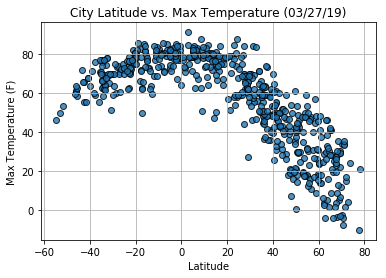

In [6]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

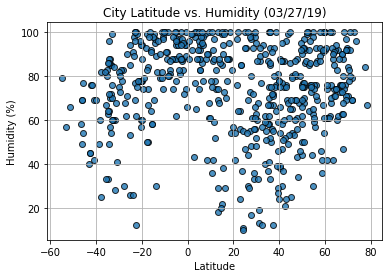

In [7]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

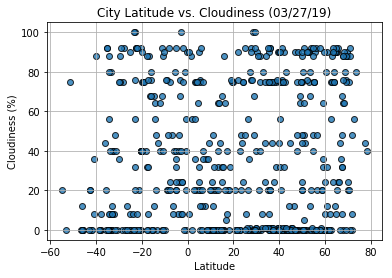

In [8]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

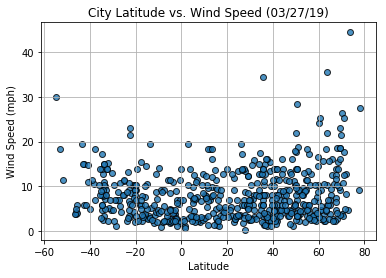

In [9]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()